<h2>Mining Delpher Data</h2>
<h3>Harvest, Clean and Analyse large amounts of digitised text</h3>

<p>When analysing sources of the National Library of the Netherlands (KB), researchers often use Delpher, the online gateway to more than 10 million pages of historical text (newspapers, books,journals & radio bulletins), mostly in Dutch. Delpher allows you to search and browse all documents in full text, making it a good resource for close reading. However, when you want to analyse large amounts of data to do distant reading, the KB allows researchers access to both the digital images, metadata, and full text in bulk via KB’s Dataservices & API’s, as well as additional data such as the Medieval Illuminated Manuscripts and the Dutch Digital Parliamentary Papers. To successfully harvest this data and subsequently clean and analyse it, you need knowledge about:

<ul>
<li> the KB’s data formats and infrastructure,</li>
<li> tools to clean the data and subsequently</li>
<li> tools to analyse the data.</li>
</ul>

<p>During this workshop, you will get a hands-on experience and guidance on all three steps. Experts of the KB (René Voorburg, Steven Claeyssens and Martijn Kleppe) will first guide you through KB’s metadata and available datasets. Then a PhD researcher of Utrecht University (Melvin Wevers) will show you which tools are available to clean the data and will assist you in making the first analyses.</p>

<p>During the first part of the workshop you will be guided through a number of exercises and all use the same dataset. During the second part you will be able to make a start with freely collecting and working with a selection of KB datasets that best fits your research interest, all under guidance of KB experts.</p>

<p>This workshop is aimed specifically at beginning users that have an interest in the KB Data. We assume no prior experience working with KB (meta)data nor any other significant technical knowledge or skills, such as programming skills, although basic computer skills are expected. The workshop will be in English. All data that we will work with, will be in Dutch.</p>

<h3>Jupyter Notebook Tips</h3>
<ul>
<li>New cells are created with the Plus button in the toolbar. When not editing, this can be done by pressing ‘b’ on your keyboard.</li>
<li>New cells are “code” cells by default, but can be changed to “Markdown” (a type of text input) in a dropdown menu on the toolbar. In edit mode, you can paste in code from this lesson or type it yourself.</li>
<li>Switching a cell to edit mode is done by pressing Enter.</li>
<li>Running a cell is done by clicking Play in the toolbar, or with Ctrl+Enter (Cmd+Return on Mac OS).</li>


In [29]:
import csv
import pandas as pd
import numpy as np
import requests

from lxml import etree

SRU_BASE_URL = 'http://jsru.kb.nl/sru/sru?'
MAX_RECORDS = 1000
pd.set_option('display.max_colwidth', -1) #this options show the full cell contents of the pandas output. 
#this option shows graphs within Jupyter
%matplotlib inline

<h2>Harvest Function</h2>

In [ ]:
def jsru_query(collection, cql, filename):
    '''
    Query jSRU to obtain from collection context (text), date and title fields,
    write results to tab separated CSV file.
    '''

    start_record = 1

    request_payload = {
        'operation': 'searchRetrieve',
        'x-collection': collection,
        'x-fields': 'content',
        'maximumRecords': MAX_RECORDS,
        'startRecord': start_record,
        'query': cql
    }

    sru_response = requests.get(SRU_BASE_URL, params=request_payload)
    sru_tree = etree.fromstring(sru_response.content)

    num_records = sru_tree.find('{http://www.loc.gov/zing/srw/}numberOfRecords')
    num_records = int(num_records.text)
    
    csv_writer = csv.writer(open(filename, 'w', newline=''), delimiter='\t')
    csv_writer.writerow(['title', 'date', 'text'])

    records_left = (num_records >= 1)
    while records_left:
        
        for record in sru_tree.iter('{http://www.loc.gov/zing/srw/}recordData'):
            title = record.find('{http://purl.org/dc/elements/1.1/}title').text
            date = record.find('{http://purl.org/dc/elements/1.1/}date').text
            text = record.find('content').text

            csv_writer.writerow([title, date, text])

        records_left=(start_record + MAX_RECORDS <= num_records)
        if records_left:
            start_record = start_record + MAX_RECORDS
            request_payload['startRecord'] = start_record
            sru_response = requests.get(SRU_BASE_URL, params=request_payload)
            sru_tree = etree.fromstring(sru_response.content)

<h2>Downloading data from Delpher</h2>

<p>Here you can run the function called jsru_query that is defined in the cell above. This function has three parameters.</p>
<ol>
<li>the collection (ANP)</li>
<li>the query ("verenigde staten" and nederland not duitsland and date within "01-01-1971 31-12-1979"), and 
<li>the name of the output file (output.csv).</li>
</ol>

Make sure to enclose these three parameters with apostrophes. 

In [ ]:
#Example Query
jsru_query('ANP', 
           '"verenigde staten" and date within "01-01-1945 31-12-1999"', 
           'output.tsv')

<h2>Importing downloaded data into Python</h2>
<p>Now we will load the tsv into python using a library called Pandas. <br> Pandas is a library that is often used by data scientists. <br> You can read more about Pandas here: https://pandas.pydata.org
<br> N.B. A table or spreadsheet is called a dataframe in Pandas. </p>
You can find a new cheat sheet here: https://www.dataquest.io/blog/images/cheat-sheets/pandas-cheat-sheet.pdf

In [30]:
#define the name of your file here as your input here. This should be the same as the name of 
#the output you defined in the query function
#delimiter indicates how the file is separated. Tabs = '\t', and commas = ','.
#df is the default name for a dataframe. You can give this variable any name you prefer. 
df = pd.read_csv('output.tsv', delimiter='\t') 

In [31]:
#this command shows you the first lines of the file. Put a number between the parenthesis to specify and exact number.
#Change df.head into df.tail to see what happens
df.head() 

,title,date,text
0,ANP Nieuwsbericht - 05-11-1974 - 20,1974/11/05 00:00:00,\n Tijd: Onderwerp: \n de verenigde staten. \n\n
1,ANP Nieuwsbericht - 17-10-1974 - 147,1974/10/17 00:00:00,\n Datum: Tijd: Onderwerp: \n de verenigde staten. + \n\n
2,ANP Nieuwsbericht - 13-10-1980 - 71,1980/10/13 00:00:00,\n Cuba en de Verenigde Staten \n Bron: \n Regels: \n\n
3,ANP Nieuwsbericht - 25-10-1974 - 125,1974/10/25 00:00:00,\n De Sovietunie en de Verenigde Staten \n Bron \n Regets: \n\n
4,ANP Nieuwsbericht - 07-12-1979 - 161,1979/12/07 00:00:00,\n Red.: Datum: Ttjd: Onderwerp: \n De Verenigde Staten en Iran \n\n


In [ ]:
len(df) #the len function shows the length of a variable. In this case how many rows in the dataframe 

In [ ]:
#if you want to view specific slices of the dataset. Let's say row 5 to 10, you can use the following command.
#N.B. the first row is numbered 0 and not 1. 
df[5:10]

<h2>Datacleaning</h2>
<p>As you have seen the text in the cell is not clean. <br>It contains superfluous character and strings. <br>The next section presents some methods to clean the text in the cell. <br>There are many different ways of doing this, these are just a few examples to give you a sense of how Python and Pandas work. </p>

In [32]:
df2 = df

In [33]:
df2['text'] = df2['text'].str.replace('Red.', '') #remove returning text (Red.)

In [ ]:
df2[5:10] #inspect the dataframe

In [34]:
df2['text'] = df2['text'].str.replace('Datum:.', '') #remove returning text (Datum:.)
df2['text'] = df2['text'].str.replace('Tijd:.', '') #remove returning text (Tijd:.)
df2['text'] = df2['text'].str.replace('Onderwerp:', '') #remove returning text (Onderwerp:)
df2['text'] = df2['text'].str.replace('\n', '') #remove newline (/n) character

In [35]:
df2['text'] = df2['text'].str.replace('\d+', '') #remove all digits from the text

In [36]:
df2['text'] = df2['text'].str.findall('\w{3,}').str.join(' ') #remove words shorter than 4 characters

In [37]:
df2['text'].replace('[!"#%\'()*+,-/:;<=>?@\[\]^_`{|}~’”“′‘\\\]',' ',inplace=True,regex=True) #remove punctuation

In [38]:
df2['text'] = df2['text'].str.lower() #convert all the text into lower case

In [ ]:
#This is a method you can use to remove articles that contain particular words
to_drop = ['Egypte', 'Turkije'] 
df2 = df2[~df2['text'].isin(to_drop)]

In [ ]:
df2[5:10] #inspect the dataframe looks

<h2>Visualization</h2> 
<p>In this section, we are going to generate a simple line graph that shows the number of articles over time. We will select different time scales.</p>

In [39]:
df2['date'] #show the date column

0        1974/11/05 00:00:00
1        1974/10/17 00:00:00
2        1980/10/13 00:00:00
3        1974/10/25 00:00:00
4        1979/12/07 00:00:00
5        1972/12/05 00:00:00
6        1974/10/16 00:00:00
7        1974/10/19 00:00:00
8        1974/10/20 00:00:00
9        1974/06/30 00:00:00
10       1974/07/27 00:00:00
11       1974/09/18 00:00:00
12       1975/01/01 00:00:00
13       1975/09/09 00:00:00
14       1975/09/19 00:00:00
15       1977/03/21 00:00:00
16       1980/10/20 00:00:00
17       1980/06/01 00:00:00
18       1980/08/05 00:00:00
19       1981/10/14 00:00:00
20       1981/07/28 00:00:00
21       1948/03/26 00:00:00
22       1948/03/26 00:00:00
23       1949/01/03 00:00:00
24       1949/07/05 00:00:00
25       1960/10/24 00:00:00
26       1960/12/02 00:00:00
27       1969/02/06 00:00:00
28       1972/06/04 00:00:00
29       1973/08/25 00:00:00
                ...         
49149    1978/07/21 00:00:00
49150    1978/07/22 00:00:00
49151    1978/07/22 00:00:00
49152    1978/

In [40]:
df2['date'] = df2['date'].str.replace(' 00:00:00', '') #re-format date to just show year-month-day

In [41]:
df2['date'] = pd.to_datetime(df2['date']) #tell Pandas that this column contains date information
df2 = df2.set_index(['date']) #set the date column as the index. This makes calculations involving time easier. 

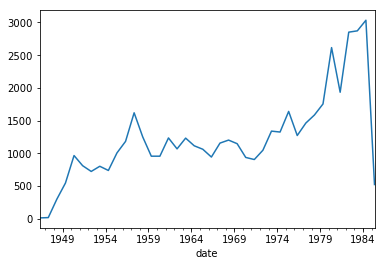

In [44]:
df2['text'].groupby(pd.TimeGrouper('12M')).count().plot(kind='line')
#also try this with D, W, M, 6M, 12M 

In [43]:
#You can create new dataframes that only contain a slice of the data based on their date. 
#Change the names of the variables 'df1970-1971' and 'df1975-1979' and the way they are sliced'
df1970_1971 = df2['1970':'1971']
df1975_1979 = df2['1975':'1979']

<h2>Output data</h2>
<p>In the next part of this workshop, we will work with raw text data. For this reason, we will export only the text column of the dataframe as one larger text-file.</p>

In [45]:
#give the .txt file a name you prefer
#we leave out the index column and the headers and only select the column 'text'
#you can also change df into the name of the slice you defined in the previous step. For instance, df1970_1971.
df2['text'].to_csv("raw_text_clean.txt", sep=' ', index=False, header=False) 

In [ ]:
#we will also output the text that was not cleaned. Save this using a different output name
df['text'].to_csv("raw_text.txt", sep=' ', index=False, header=False) 